## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [1]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [3]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [5]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [6]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [7]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

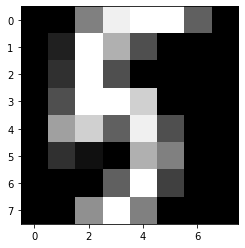

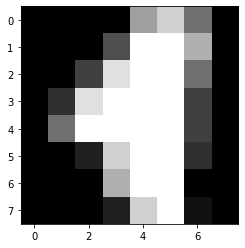

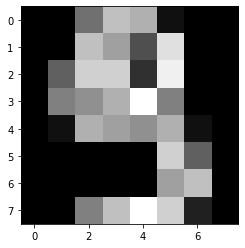

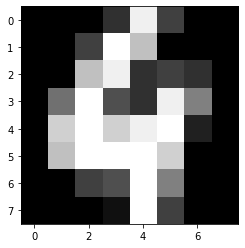

In [9]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [10]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

# Using Keras

## Deep Network

In [11]:
import tensorflow as tf
from tensorflow import keras

# fix random seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

In [12]:
%%time

# create model stucture
model = keras.models.Sequential()
model.add(keras.layers.Input(64))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # final layer, 10 categories


# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# if you want to overide the defaults for the optimizer....
#adam = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


CPU times: total: 125 ms
Wall time: 518 ms


In [13]:
%%time

# fit the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=100)


Epoch 1/20
15/15 [==============================] - 2s 40ms/step - loss: 5.1204 - accuracy: 0.1225 - val_loss: 2.1956 - val_accuracy: 0.2583
Epoch 2/20
15/15 [==============================] - 0s 10ms/step - loss: 1.6954 - accuracy: 0.4224 - val_loss: 1.2899 - val_accuracy: 0.5361
Epoch 3/20
15/15 [==============================] - 0s 10ms/step - loss: 1.0225 - accuracy: 0.6841 - val_loss: 0.8180 - val_accuracy: 0.7806
Epoch 4/20
15/15 [==============================] - 0s 10ms/step - loss: 0.6627 - accuracy: 0.8191 - val_loss: 0.5350 - val_accuracy: 0.8611
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 0.4608 - accuracy: 0.8636 - val_loss: 0.4170 - val_accuracy: 0.8750
Epoch 6/20
15/15 [==============================] - 0s 10ms/step - loss: 0.3536 - accuracy: 0.8991 - val_loss: 0.3457 - val_accuracy: 0.8972
Epoch 7/20
15/15 [==============================] - 0s 10ms/step - loss: 0.2776 - accuracy: 0.9179 - val_loss: 0.2800 - val_accuracy: 0.9111
Epoch 8/20
15/

In [14]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores
# In results, first is loss, second is accuracy

[0.10892120003700256, 0.9694444537162781]

In [15]:
# let's format this into a better output...

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.11
accuracy: 96.94%


## Wide and Deep Network

In [16]:
#Define the model: for multi-class

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=64))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
# Compile model

#Optimizer:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [18]:
# Fit the model

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=100)

Epoch 1/20
15/15 [==============================] - 2s 35ms/step - loss: 1.8344 - accuracy: 0.5233 - val_loss: 0.4011 - val_accuracy: 0.8667
Epoch 2/20
15/15 [==============================] - 0s 11ms/step - loss: 0.3214 - accuracy: 0.9026 - val_loss: 0.2606 - val_accuracy: 0.9167
Epoch 3/20
15/15 [==============================] - 0s 10ms/step - loss: 0.1758 - accuracy: 0.9402 - val_loss: 0.2064 - val_accuracy: 0.9278
Epoch 4/20
15/15 [==============================] - 0s 11ms/step - loss: 0.1062 - accuracy: 0.9666 - val_loss: 0.1332 - val_accuracy: 0.9472
Epoch 5/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0641 - accuracy: 0.9784 - val_loss: 0.1474 - val_accuracy: 0.9528
Epoch 6/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0604 - accuracy: 0.9777 - val_loss: 0.0972 - val_accuracy: 0.9639
Epoch 7/20
15/15 [==============================] - 0s 14ms/step - loss: 0.0286 - accuracy: 0.9937 - val_loss: 0.1079 - val_accuracy: 0.9667
Epoch 8/20
15

In [19]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores

# In results, first is loss, second is accuracy

[0.26845261454582214, 0.9333333373069763]

In [20]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.27
accuracy: 93.33%


## RandomGridSearch - normal

In [21]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier
from keras.initializers import GlorotNormal

score_measure = "accuracy"
kfolds = 5

def build_clf(hidden_layer_sizes, dropout):
    ann = tf.keras.models.Sequential()
    ann.add(keras.layers.Input(shape=64)),
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, kernel_initializer= tf.keras.initializers.GlorotNormal(), 
                                     bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    ann.add(tf.keras.layers.Dense(10, activation='softmax'))
    ann.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return ann


CPU times: total: 0 ns
Wall time: 97.1 ms


For more information on dense layers and initializers, see the following:
* https://keras.io/api/layers/core_layers/dense/
* https://keras.io/api/layers/initializers/

In [28]:
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=64,
    dropout = 0.0
)


In [29]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

params = {
    'optimizer__learning_rate': [0.0005, 0.001, 0.005],
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)],
    'model__dropout': [0, 0.1],
    'batch_size':[20, 60, 100],
    'epochs':[10, 50, 100],
    'optimizer':["adam",'sgd']
}
keras_clf.get_params().keys()



dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_layer_sizes', 'dropout', 'class_weight'])

In [30]:
rnd_search_cv = RandomizedSearchCV(estimator=keras_clf, param_distributions=params, scoring='accuracy', n_iter=50, cv=5)

import sys
sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
callback = [earlystop]

_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


5/5 [==============================] - 0s 5ms/step


In [31]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.001,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (70,),
 'model__dropout': 0.1,
 'epochs': 50,
 'batch_size': 20}

In [32]:
best_net = rnd_search_cv.best_estimator_
print(rnd_search_cv.best_params_)

{'optimizer__learning_rate': 0.001, 'optimizer': 'adam', 'model__hidden_layer_sizes': (70,), 'model__dropout': 0.1, 'epochs': 50, 'batch_size': 20}


In [33]:
%%time
y_pred = best_net.predict(X_test)
print(classification_report(y_test, y_pred))

18/18 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       1.00      0.86      0.92        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       0.92      0.95      0.94        38
           5       0.88      1.00      0.94        30
           6       0.95      1.00      0.97        37
           7       0.97      0.95      0.96        37
           8       0.96      0.93      0.95        29
           9       0.97      0.97      0.97        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

CPU times: total: 46.9 ms
Wall time: 139 ms


In [34]:
## RandomGridSearch - uniform

In [35]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier
from keras.initializers import GlorotNormal

score_measure = "accuracy"
kfolds = 5

def build_clf(hidden_layer_sizes, dropout):
    ann = tf.keras.models.Sequential()
    ann.add(keras.layers.Input(shape=64)),
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, kernel_initializer= tf.keras.initializers.GlorotUniform(), 
                                     bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    ann.add(tf.keras.layers.Dense(10, activation='softmax'))
    ann.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return ann

CPU times: total: 0 ns
Wall time: 0 ns


In [36]:
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=64,
    dropout = 0.0
)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

params = {
    'optimizer__learning_rate': [0.0005, 0.001, 0.005],
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)],
    'model__dropout': [0, 0.1],
    'batch_size':[20, 60, 100],
    'epochs':[10, 50, 100],
    'optimizer':["adam",'sgd']
}
keras_clf.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_layer_sizes', 'dropout', 'class_weight'])

In [38]:
rnd_search_cv = RandomizedSearchCV(estimator=keras_clf, param_distributions=params, scoring='accuracy', n_iter=50, cv=5)

import sys
sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
callback = [earlystop]

_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


5/5 [==============================] - 0s 5ms/step


In [39]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.0005,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (100,),
 'model__dropout': 0,
 'epochs': 50,
 'batch_size': 20}

In [40]:
best_net = rnd_search_cv.best_estimator_
print(rnd_search_cv.best_params_)

{'optimizer__learning_rate': 0.0005, 'optimizer': 'adam', 'model__hidden_layer_sizes': (100,), 'model__dropout': 0, 'epochs': 50, 'batch_size': 20}


In [42]:
%%time
y_pred = best_net.predict(X_test)
print(classification_report(y_test, y_pred)) 

18/18 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      0.97      0.99        35
           2       1.00      1.00      1.00        36
           3       1.00      0.95      0.97        41
           4       0.95      0.97      0.96        38
           5       0.91      1.00      0.95        30
           6       1.00      1.00      1.00        37
           7       0.97      0.92      0.94        37
           8       0.97      0.97      0.97        29
           9       0.94      0.97      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.98      0.97      0.98       360

CPU times: total: 46.9 ms
Wall time: 109 ms


From the above analysis we can conclude that the uniform disturbution has higher accuracy with 0.97 than compared to the normal disturbution.
